In [60]:
from transmitter import *
from reciever import *
import numpy as np
import simpleaudio as sa
from scipy.io.wavfile import read
from scipy.fft import fft
import matplotlib.pyplot as plt

In [61]:
fs = 44100
class OFDM:
    pass
ofdm = OFDM()
ofdm.N = 2048                   # Length of DTF
ofdm.start_bin = 50
ofdm.end_bin = 788
ofdm.CP = 256                      
ofdm.sfp = 60                   # Symbols per frame

ofdm.num_tones = 21             # Number of pilot tones
ofdm.pilot_locs = np.int64(np.linspace(49,789,ofdm.num_tones))     # Pilot locations
ofdm.pilot_vals = np.array([1+1j]*21)

ofdm.rate = "1/2"
ofdm.z = 81

ofdm.bps = 2                    # bits per symbol QFSK
ofdm.spb = 720                  # data symbols per block
ofdm.preamb = ofdm.N//2
ofdm.QFSK_dict = {              # The constellation
    (1,1) : -1-1j,
    (1,0) :  1-1j,
    (0,0) :  1+1j,
    (0,1) : -1+1j}

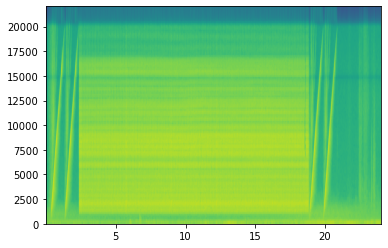

895234 820234 920234 1058400 7989 107989


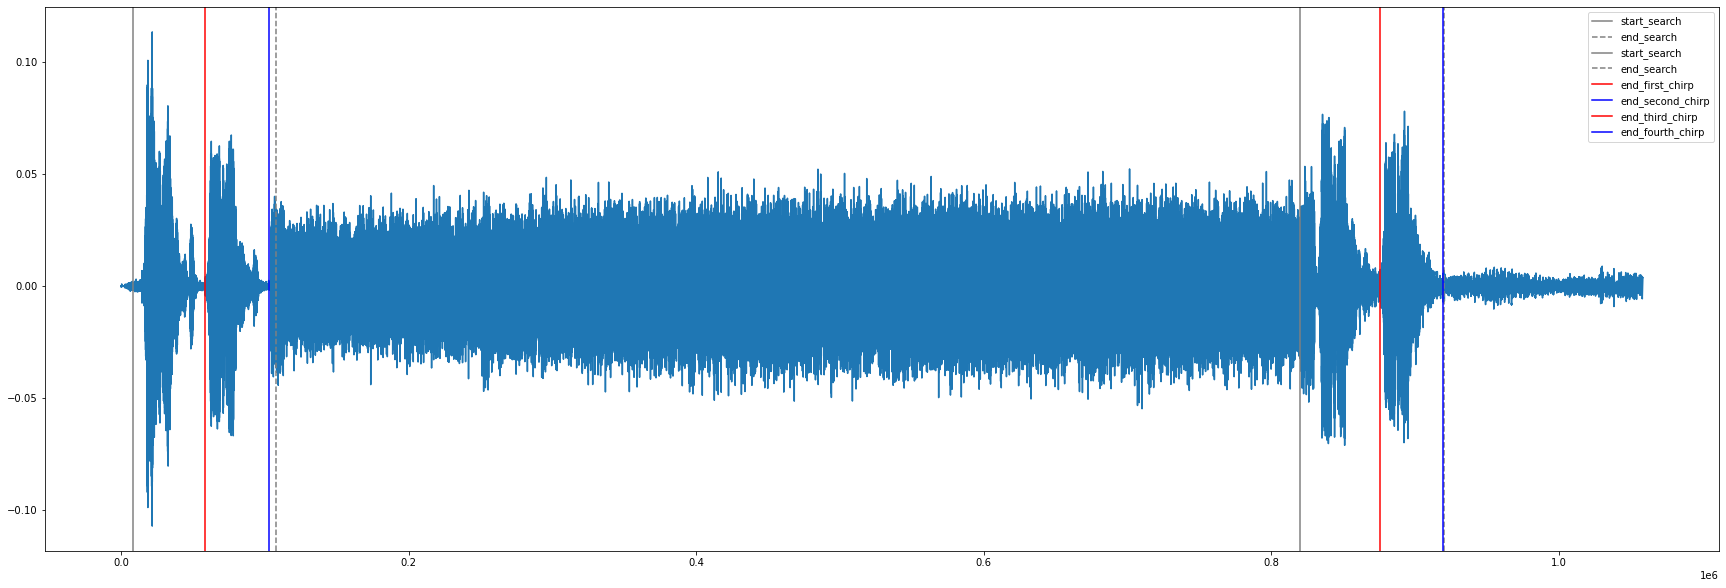

In [170]:
Fs, auds = read('Group_2c_rec.wav')

powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(auds, Fs=fs)
plt.show()
try:
    chirps = chirpEnds(auds, graph_display=True)
except:
    chirps = chirpEnds(-auds, graph_display=True)
delayed_start = chirps[1] + 1500 + 1
delayed_end = chirps[2] - 44100 - 1500 - 1

Difference in end, new, snc?: 9228 829938 820710


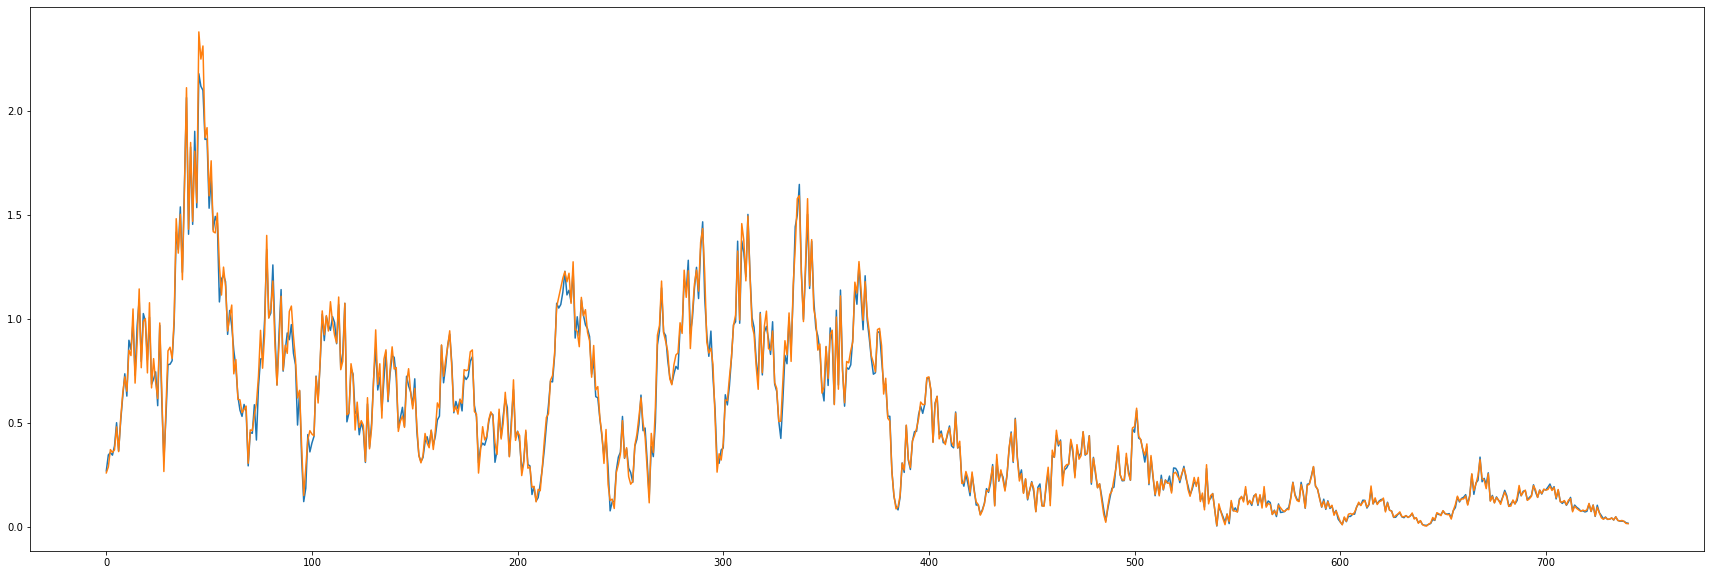

In [171]:
ayy,bee = channelEstimate(auds[delayed_start:delayed_start+2304*4], ofdm)

data_start  = delayed_start+2304*4
delayed_end_snc = delayed_end - 2304*4
num_symbs_guess = round((delayed_end-data_start)/2304)
new_end = data_start + num_symbs_guess*2304
print("Difference in end, new, snc?:", new_end-delayed_end_snc, new_end, delayed_end_snc)
plt.figure(figsize = (30, 10))

plt.plot(abs(ayy))
plt.plot(abs(bee))

(433440,)
431568
(431568,)


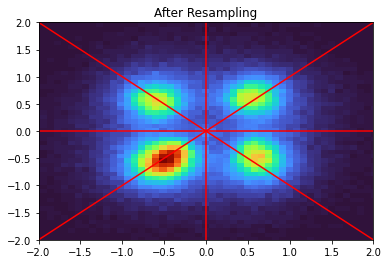

In [192]:
of=2
fo=0
roteat =  0.1j

win_len = delayed_end-data_start+of-fo
win = scipy.signal.get_window('hamming', win_len)
resampled_aud = scipy.signal.resample(auds[data_start+fo:delayed_end+of], new_end-data_start) #chanest_padd(ayy,ofdm)

decoded, symbols_rec = standard_deconstructor(resampled_aud,ofdm,channel_H=chanest_padd(ayy,ofdm),retSymbs=True,ldpc_encoded=True,add_rotate=roteat)

plt.hist2d(np.real(symbols_rec.flatten()), np.imag(symbols_rec.flatten()), bins=(2000, 2000), cmap=plt.cm.turbo)
plt.axvline(x = 0 , color = 'r')
plt.axhline(y = 0 , color = 'r')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axline((-2,-2), (2,2), color ='r')
plt.axline((2,-2), (-2,2), color ='r')
plt.title('After Resampling')
plt.show()


In [65]:

win_len = delayed_end-data_start+of-fo
win = scipy.signal.get_window('hamming', win_len)
resampled_aud2 = scipy.signal.resample(auds[data_start+fo:delayed_end+of], new_end-data_start)
resampled_aud_win = scipy.signal.resample(auds[data_start+fo:delayed_end+of], new_end-data_start, window = win)

#decoded, symbols_rec = standard_deconstructor(resampled_aud4, ofdm, channel_H = chanest_padd(ayy,ofdm), retSymbs = True)
decoded2, symbols_rec2 = standard_deconstructor(resampled_aud2, ofdm, channel_H = chanest_padd(ayy,ofdm), retSymbs = True, add_rotate=roteat, ldpc_encoded = True)
decoded_win, symbols_rec_win = standard_deconstructor(resampled_aud_win, ofdm, channel_H = chanest_padd(ayy,ofdm), retSymbs = True, add_rotate=roteat, ldpc_encoded = True)

fig, axs = plt.subplots(1,2, figsize = (12,6), dpi = 300)

axs[0].hist2d(np.real(symbols_rec_win.flatten()), np.imag(symbols_rec_win.flatten()), bins=(1000, 1000),cmap=plt.cm.turbo)
axs[0].axvline(x = 0 , color = 'r')
axs[0].axhline(y = 0 , color = 'r')
axs[0].set_xlim(-2,2)
axs[0].set_ylim(-2,2)
axs[0].set_xlabel("Re")
axs[0].set_ylabel("Im")
axs[0].set_title("After Resampling - Window")


axs[1].hist2d(np.real(symbols_rec2.flatten()), np.imag(symbols_rec2.flatten()), bins=(1000, 1000),cmap=plt.cm.turbo)
axs[1].axvline(x = 0 , color = 'r')
axs[1].axhline(y = 0 , color = 'r')
axs[1].set_xlim(-2,2)
axs[1].set_ylim(-2,2)
axs[1].set_xlabel("Re")
axs[1].set_ylabel("Im")
axs[1].set_title("After Resampling - No Window")

(1006560,)
1005048
(1005048,)


KeyboardInterrupt: 

In [ ]:
file_type, data_len = decode_header(decoded)
print(file_type,data_len)
data = decoded[7*8*3:data_len*8]
str_data = [str(i) for i in data]
bytes_int = [int(''.join(map(str, str_data[i:i+8])),2) for i in range(0, len(str_data), 8)]
with open("trialb_group_1{}".format(file_type), 'wb') as f:
    f.write(bytearray(bytes_int))

ValueError: There are too many errors in the input header

In [169]:
data = decoded[:26800*8]
str_data = [str(i) for i in data]
bytes_int = [int(''.join(map(str, str_data[i:i+8])),2) for i in range(0, len(str_data), 8)]


with open("trial3_group_2{}".format('.tiff'), 'wb') as f:
    f.write(bytearray(bytes_int))


39384 b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x01,\x01,\x00\x00\xff\xe1\x00\x8cExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x05\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00J\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00R\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00Z\x00\x00\x00\x00\x00\x00\x01,\x00\x00\x00\x01\x00\x00\x01,\x00\x00\x00\x01\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x03\x8d\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x01\xff\x00\x00\x00\x00\xff\xed\x008Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x008BIM\x04%\x00\x00\x00\x00\x00\x10\xd4\x1d\x8c\xd9\x8f\x00\xb2\x04\xe9\x80\t\x98\xec\xf8B~\xff\xc0\x00\x11\x08\x01\xff\x03\x8d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04

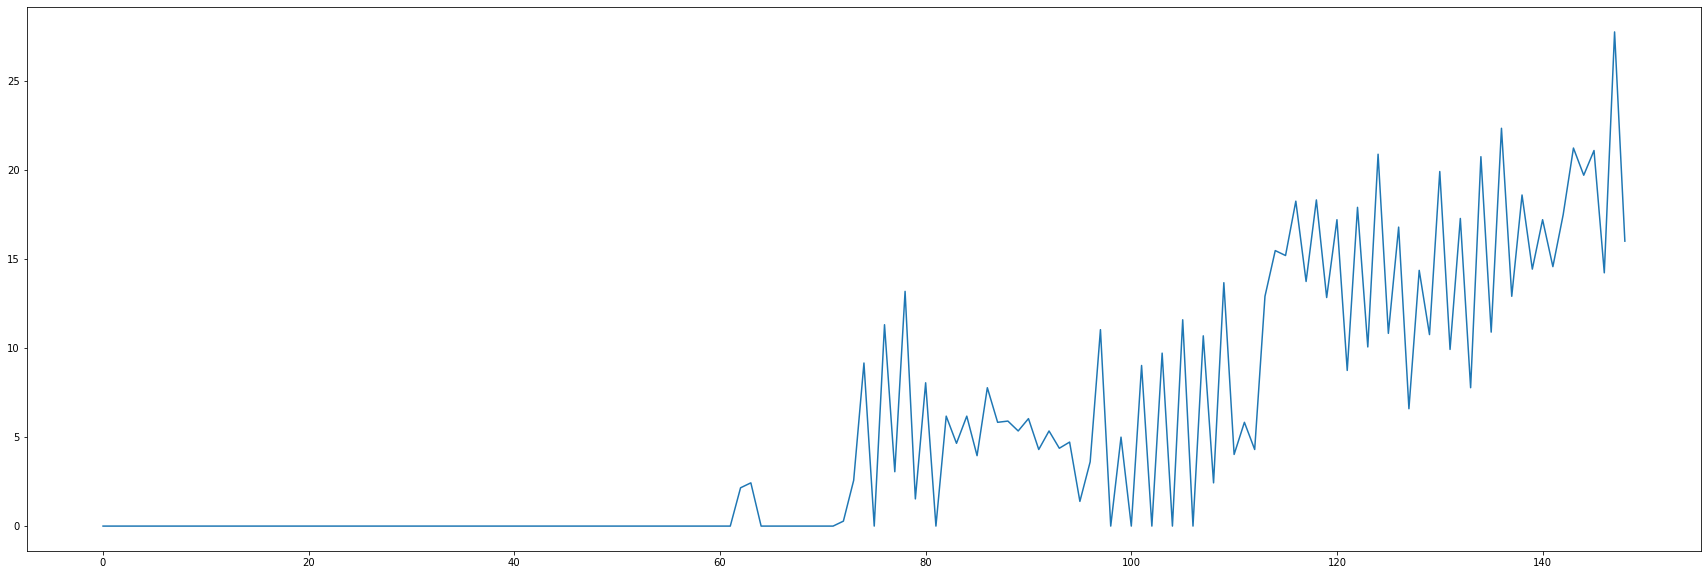

In [193]:
f = open("pitbull.jpg", "rb")
bytes = f.read()
print(len(bytes),bytes)
plt.figure(figsize = (30, 10))

byte_array = [i for i in bytes]
print(byte_array)
bin_byte_array = ["{0:08b}".format(i) for i in byte_array] # Binary bytes
print(bin_byte_array)
bitty = np.array([bity for bytey in bin_byte_array for bity in bytey]).astype(int)
ldpc = LDPC(rate = ofdm.rate, z = ofdm.z)
ldpc_ified = ldpc.encode(bitty)

bit_array = bitsFromTiff('jaguar.tiff')


print(ldpc_ified)
#plt.plot(errorss(decoded[:39384*8*2], ldpc_ified.flatten()[:39384*8*2]))
plt.plot(errorss(decoded[:26800*8], bit_array))